<a href="https://colab.research.google.com/github/rbbh/ARIMA-playground/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.0MB/s 


In [0]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from google.colab import files
uploaded = files.upload()

Saving milk.txt to milk.txt


In [0]:
import io
import pandas as pd

# Un-comment the line for the data base that
# you want to predict

#data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['DadosONS.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['carsales.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['accidentalDeathUSA.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['electric.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['gas.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['lakeerie.txt']))
data = pd.read_csv(io.BytesIO(uploaded['milk.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['redwine.txt']))

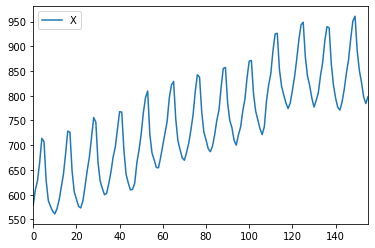

In [23]:
data.plot()

In [0]:
data_n = data.copy()
data_n = data_n/data_n.max()

In [25]:
len(data)

156

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros 

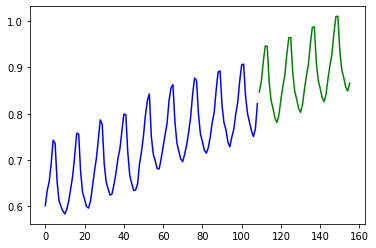

In [26]:
# Load/split the data
train, test = train_test_split(data_n, train_size=109)

# Fit the model
model = pm.auto_arima(train, seasonal=True, m=12)

# Make the forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_n.shape[0])
plt.plot(x[:109], train, c='blue')
plt.plot(x[109:], forecasts, c='green')
plt.show()

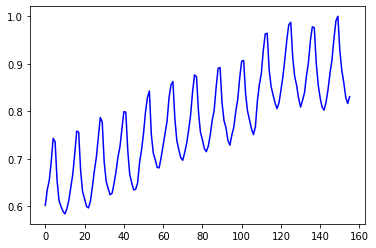

In [27]:
x = np.arange(data.shape[0])
plt.plot(x, data_n, c='blue')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [29]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.0003920150730178974


In [0]:
# Extra packages for if the traditional prediction
# method doesn't work

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

In [31]:
# Define and fit the pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(1, 1, 1, 12) (constant=True); AIC=-623.869, BIC=-603.271, Time=2.914 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=-551.904, BIC=-546.755, Time=0.136 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=-649.377, BIC=-639.079, Time=1.820 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=-614.101, BIC=-603.802, Time=1.212 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=-397.799, BIC=-395.224, Time=0.027 seconds
Fit ARIMA: (1, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=-635.715, BIC=-627.990, Time=0.240 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 0, 12) (constant=True); AIC=-646.637, BIC=-633.763, Time=3.085 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 1, 12) (constant=True); AIC=-646.134, BIC=-633.261, Time=1.823 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)
Fit A

Pipeline(steps=[('boxcox',
                 BoxCoxEndogTransformer(floor=1e-16, lmbda=None, lmbda2=1e-06,
                                        neg_action='raise')),
                ('arima',
                 AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
                           information_criterion='aic', m=12, max_D=1, max_P=2,
                           max_Q=2, max_d=2, max_order=5, max_p=5, max_q=5,
                           maxiter=50, method='lbfgs', n_fits=10, n_jobs=1,
                           offset_test_args=None, out_of_sample_size=0,
                           random=False, random_state=None, scoring='mse',
                           scoring_args=None, seasonal=True,
                           seasonal_test='ocsb', seasonal_test_args=None,
                           start_P=1, start_Q=1, start_p=2, start_params=None, ...))])

In [0]:
# Serializing the model:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)

In [33]:
# Loading it and making predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    forecasts = mod.predict(47)
    print(forecasts)

[0.84965363 0.87203744 0.91762376 0.95290104 0.95234218 0.87420341
 0.83214129 0.8130635  0.7912488  0.78030387 0.79795021 0.83615946
 0.86685798 0.89141816 0.93923222 0.9763265  0.97674145 0.89792618
 0.85562582 0.83660961 0.81469352 0.80378884 0.82201692 0.86119616
 0.8926718  0.91785253 0.96673806 1.00465921 1.00514289 0.92475951
 0.88160869 0.86221667 0.83985341 0.8287306  0.84736351 0.88738702
 0.91953296 0.94524507 0.9951423  1.033838   1.03433515 0.95231142
 0.90826275 0.88846356 0.86562661 0.85426714 0.87329848]


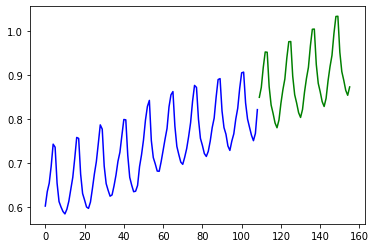

In [34]:
x = np.arange(data_n.shape[0])
plt.plot(x[:109], train, c='blue')
plt.plot(x[109:], forecasts, c='green')
plt.show()

In [35]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.0006115155957446397
